# Naive k-means clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src import data, kmeans

# Change this or set this to None for different results
SEED = 12345

## Clustering 1-dimensional data

[ ] Animation with centroids

[ ] Comparison with given clustering

[ ] Testing different k's and convergence time

[ ] Formal evaluation

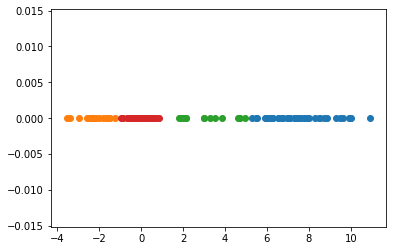

In [2]:
points, ideal_clusters = data.get_1d_dataset()

k = 4
clusters = kmeans.k_means_clustering(points, k, SEED)
for cluster in clusters:
    plt.scatter(cluster, np.zeros_like(cluster))

## Clustering 2-dimensional data

[ ] Animation with centroids

[ ] Comparison with given clustering

[ ] Testing different k's and convergence time

[ ] Formal evaluation

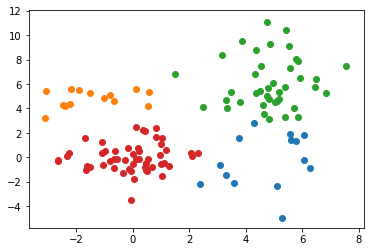

In [6]:
points, ideal_clusters = data.get_2d_dataset()

k = 4
clusters = kmeans.k_means_clustering(points, k, SEED)
for cluster in clusters:
    plt.scatter(cluster[:,0], cluster[:,1])